In [5]:
## import functions

from Functions import *
import numpy as np

Import images

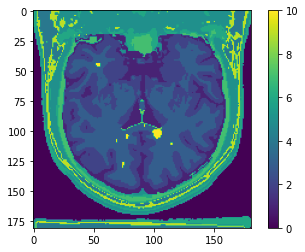

In [6]:
import rawpy
import numpy as np
from matplotlib import pylab as plt
import pandas

#T1-weighted MRI sequence
t1 = np.fromfile("t1.raw", dtype='uint8')
t1 = t1.reshape([181,181,217])

#T2-weighted MRI sequence
t2 = np.fromfile("t2.raw", dtype='uint8')
t2 = t2.reshape([181,181,217])

#Density-weighted MRI sequence
pd = np.fromfile("pd.raw", dtype='uint8')
pd = pd.reshape([181,181,217])

mask = np.fromfile("msk.raw", dtype='uint8')
mask = mask.reshape([181,181,217])

## Mask contains labels for brain tissues
# 1 - CSF (cerebrospinal fluid)
# 2 - GM (grey matter)
# 3 - WM (white matter)
# 10 - lesions 

# Mask image at z-axis 90
plt.imshow(mask[:,:,90])
plt.colorbar()

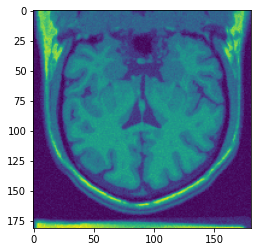

In [7]:
# T1 image at z-axis 90
plt.imshow(t1[:,:,90])

In [8]:
## Read only every 5th slice on z-axis (due to time constraints)

t1 = t1[:,:,::5]
t2 = t2[:,:,::5]
pd = pd[:,:,::5]
mask = mask[:,:,::5]


In [9]:
## input template for combine_images: (t1,t2,pd,mask)
## input template for binary_mask_function: (mask,lesions=True/False)


## Combine all image sequences in a Nxd array
# N number of all pixels, d number of images (=3)
combined,coordinates, group = combine_images(binary_mask_function(mask,False)[1],t1,t2,pd,)


# Binary mask has values 1 for CSF, WM and GM; 0 for rest
# Mask_2 has values 1 for CSF, 2 GM and 3 WM; 0 for rest
binary_mask,mask_2 = binary_mask_function(mask,False)
combined = np.array(combined)

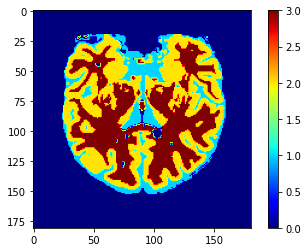

In [17]:
# mask_2 at z coordinate 90 (18*5)
im = plt.imshow(mask_2[:,:,18],cmap='jet')
plt.colorbar(im)

#plt.savefig('mask90.png')

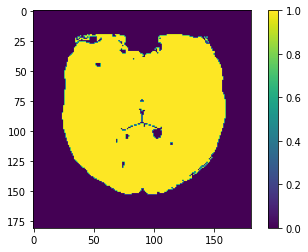

In [11]:
# binary mask at z coordinate 90 (18*5)

im = plt.imshow(binary_mask[:,:,18])
plt.colorbar(im)

#plt.savefig('binarymask90.png')

In [12]:
## input template = (mask,imaxiter = maximal iteration number,ik = number of clusters, lesions=True/false,t1,t2,pd,)

# Performing brain segmentation using naive kmeans++ clusterring. Max iteration for clustering is set to 20. 
# Number of clusters iK is set to 3. We want to segment brain tissue into CSF, WM and GM.
# mrBrainSegmentatin first performs function KmeansInit which determines initial cluster centers
# Functions kMeansPP and nonparClassification are used to cluster and classify pixels
# mrBrainSegmentatin returns reconstructed (segmented) image size 181x181x217, segmentedLabels (labels gained through kmeans segmentation) size Nx1 and true labels from given mask  

reconstructed_image,segmentedLabels, trueLabels = mrBrainSegmentation( mask ,20,3, False, t1,t2,pd )

[[136.         102.         174.        ]
 [108.93869656  86.06505066 175.23246928]
 [ 59.72802762 173.49372544 199.87395133]]
[[ 51.98979759 181.19129519 201.9041418 ]
 [108.93126099  81.02041044 176.67903663]
 [141.25408971  71.92046321 167.53849311]]
[[ 51.21717263 182.72696098 202.1311651 ]
 [100.07429818  89.19705928 183.02018476]
 [134.0017907   64.70648923 162.98367466]]
[[ 49.91060352 185.6260423  202.73702207]
 [ 97.70941959  92.27808644 184.93986135]
 [131.39510427  65.48147259 163.55957037]]
[[ 49.28897726 187.07277413 203.07323199]
 [ 96.7692049   93.51168994 185.51416928]
 [130.45354938  65.97599941 164.01337449]]
[[ 49.0354981  187.68429209 203.22543942]
 [ 96.36203317  94.04767479 185.73593458]
 [130.05176493  66.20368733 164.2359658 ]]
[[ 48.92149134 187.9377763  203.28043941]
 [ 96.18699767  94.28701739 185.83605303]
 [129.86880635  66.30759973 164.34050674]]
[[ 48.87003485 188.06957555 203.31451193]
 [ 96.10576727  94.40014646 185.88022574]
 [129.78580749  66.35184161

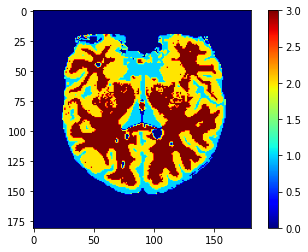

In [13]:
plt.imshow(reconstructed_image[:,:,18],cmap="jet" )
plt.colorbar()
#plt.savefig('reconstruction3d.png')

Comparing 90th slice of reconstructed_image with mask_2 we can detirmine that segmentation was very successful. Most of the falsely classifield pixels are at the boundary between tissues.

In [14]:
computeDiceCoeff(trueLabels,segmentedLabels)

[0.9570679506324961, 0.937399231672605, 0.943246211928334, 0]

High score (close to perfect 1) of Dice Coefficient for all CSF, WM and GM.

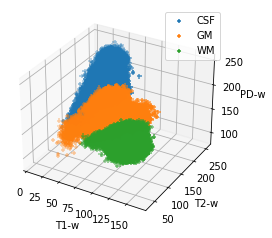

In [18]:
## Plot of 3D feature space with segmented label color coding 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(combined[np.where(segmentedLabels==1),0], combined[np.where(segmentedLabels==1),1], combined[np.where(segmentedLabels==1),2], marker='+',label='CSF');
ax.scatter(combined[np.where(segmentedLabels==2),0], combined[np.where(segmentedLabels==2),1], combined[np.where(segmentedLabels==2),2], marker='+',label='GM');
ax.scatter(combined[np.where(segmentedLabels==3),0], combined[np.where(segmentedLabels==3),1], combined[np.where(segmentedLabels==3),2], marker='+',label='WM');

ax.set_xlabel('T1-w')
ax.set_ylabel('T2-w')
ax.set_zlabel('PD-w')

ax.legend(loc='upper right')

#plt.savefig('seg3Dscatter.png')

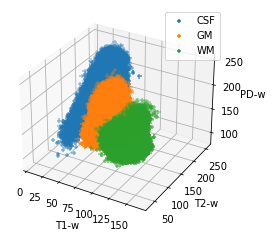

In [20]:
## Plot of 3D feature space with true label color coding 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(combined[np.where(trueLabels==1),0], combined[np.where(trueLabels==1),1], combined[np.where(trueLabels==1),2], marker='+',label='CSF');
ax.scatter(combined[np.where(trueLabels==2),0], combined[np.where(trueLabels==2),1], combined[np.where(trueLabels==2),2], marker='+',label='GM');
ax.scatter(combined[np.where(trueLabels==3),0], combined[np.where(trueLabels==3),1], combined[np.where(trueLabels==3),2], marker='+',label='WM');

ax.set_xlabel('T1-w')
ax.set_ylabel('T2-w')
ax.set_zlabel('PD-w')

ax.legend(loc='upper right')

#plt.savefig('seg3Dscatter.png')